<a href="https://colab.research.google.com/github/for-electronics/ml-computer-vision/blob/main/ML_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import pandas as pd
import os
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load CSV file
data_path = "/content/drive/MyDrive/Colab Notebooks/archive/train/train.csv"  # Update with actual path
data = pd.read_csv(data_path)

# Define image directory
image_dir = "/content/drive/MyDrive/Colab Notebooks/archive/train/images"  # Update with actual path

# Load images and labels
images = []
labels = []
img_size = 224  # Resize images to 224x224

for _, row in data.iterrows():
    img_path = os.path.join(image_dir, row["image_names"])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(row["emergency_or_not"])

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

# Load MobileNetV2 as base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base model

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Compile model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=10)

# Save the model
model.save("emergency_vehicle_classifier.h5")

print("Model training complete and saved as emergency_vehicle_classifier.h5")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8297 - loss: 0.4908 - val_accuracy: 0.9577 - val_loss: 0.2083
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9498 - loss: 0.2155 - val_accuracy: 0.9718 - val_loss: 0.0591
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9374 - loss: 0.1465 - val_accuracy: 1.0000 - val_loss: 0.0637
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9560 - loss: 0.1571 - val_accuracy: 0.9859 - val_loss: 0.0340
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9704 - loss: 0.0878 - val_accuracy: 0.9718 - val_loss: 0.0788
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9654 - loss: 0.1330 - val_accuracy: 1.0000 - val_loss: 0.0257
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9486 - loss: 0.1315 - val_accuracy: 1.0000 - val_loss: 0.0522
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9717 - loss: 0.0776 - val_accuracy: 1.0000 - val_loss: 0.0335
Epoch 9/

Model training complete and saved as emergency_vehicle_classifier.h5


In [15]:
import tensorflow as tf
import cv2
import numpy as np
import os

# Load the trained model
model = tf.keras.models.load_model("emergency_vehicle_classifier.h5")

# Define image path (update with actual test image)
test_image_path = "/content/drive/MyDrive/Colab Notebooks/archive/test/ambulance_test4.webp"  # Change this

# Preprocess the image
img_size = 224  # Same size used during training
img = cv2.imread(test_image_path)

if img is not None:
    img = cv2.resize(img, (img_size, img_size))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img)[0][0]

    # Output result
    if prediction >= 0.5:
        print(f"🚨 Emergency Vehicle Detected! (Confidence: {prediction:.2f})")
    else:
        print(f"✅ Normal Vehicle Detected (Confidence: {1 - prediction:.2f})")
else:
    print("Error: Could not load the image.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
🚨 Emergency Vehicle Detected! (Confidence: 0.99)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


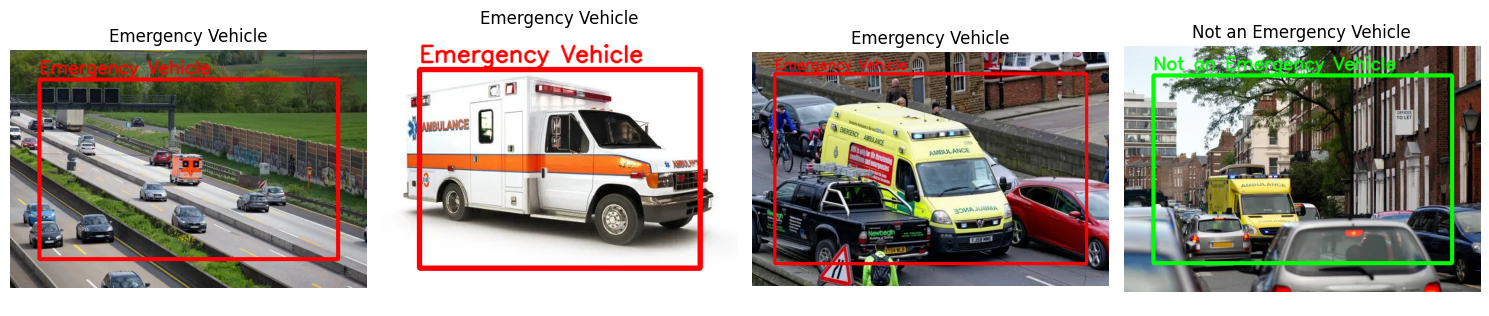

Model Accuracy on Test Set: 75.00%


In [24]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model
model_path = "emergency_vehicle_classifier.h5"  # Update the path if needed
model = tf.keras.models.load_model(model_path)

# Define the folder containing test images
image_folder = "/content/drive/MyDrive/Colab Notebooks/archive/test"  # Update with actual folder path
image_files = [f for f in os.listdir(image_folder) ]

# Ground truth labels (optional) for accuracy calculation
ground_truth = {
    "ambulance_test1.webp": 1,  # 1 = Emergency Vehicle, 0 = Not an Emergency Vehicle
    "ambulance_test2.webp": 1,
    "ambulance_test3.webp": 1,
    "ambulance_test4.webp": 1,
    # Add labels for all images
}

# Counters for accuracy
correct_predictions = 0
total_images = len(image_files)

# Create a figure to display all images together
fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))

for idx, image_name in enumerate(image_files):
    image_path = os.path.join(image_folder, image_name)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load {image_name}. Check the path!")
        continue

    orig_image = image.copy()  # Keep a copy of the original image
    image = cv2.resize(image, (224, 224))  # Resize to match model input
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(image)[0][0]  # Get prediction score

    # Set threshold (assuming binary classification: 1 = emergency, 0 = non-emergency)
    threshold = 0.5
    predicted_label = 1 if prediction >= threshold else 0
    label_text = "Emergency Vehicle" if predicted_label == 1 else "Not an Emergency Vehicle"
    color = (0, 0, 255) if predicted_label == 1 else (0, 255, 0)  # Red for emergency, green otherwise

    # Check accuracy if ground truth available
    if image_name in ground_truth:
        correct_predictions += int(predicted_label == ground_truth[image_name])

    # Draw a bounding box (assuming whole image represents detected object)
    h, w, _ = orig_image.shape
    start_point = (50, 50)
    end_point = (w - 50, h - 50)
    thickness = 5
    cv2.rectangle(orig_image, start_point, end_point, color, thickness)

    # Put label text
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(orig_image, label_text, (50, 40), font, 1, color, 2, cv2.LINE_AA)

    # Display in subplot
    axes[idx].imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
    axes[idx].axis("off")
    axes[idx].set_title(label_text)

# Show all images in one figure
plt.tight_layout()
plt.show()

# Calculate accuracy
if total_images > 0:
    accuracy = (correct_predictions / total_images) * 100
    print(f"Model Accuracy on Test Set: {accuracy:.2f}%")
else:
    print("No images found for testing.")


In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 63.5/127.9 MB 52.6 MB/s eta 0:00:02